In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


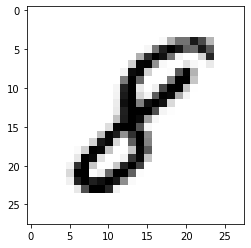

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.2012 - accuracy: 0.9401
Epoch 2/10
60000/60000 [==============================] - 46s 762us/step - loss: 0.0821 - accuracy: 0.9742
Epoch 3/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0587 - accuracy: 0.9814s - loss: 0
Epoch 4/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0435 - accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 45s 743us/step - loss: 0.0368 - accuracy: 0.9874
Epoch 6/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0286 - accuracy: 0.9909
Epoch 7/10
60000/60000 [==============================] - 45s 753us/step - loss: 0.0245 - accuracy: 0.9918
Epoch 8/10
60000/60000 [==============================] - 46s 764us/step - loss: 0.0227 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0190 - accuracy: 0.9934
Epoch 10/10
60000/60000 [=

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 161us/step


[0.0763482542308972, 0.9832000136375427]

9


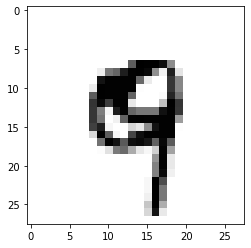

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# Our Stuff

In [155]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [128]:
one = cv2.imread(r'C:\Users\MattHetrick\Documents\Academics\Fall 2019\Cos 429\Final-Project\One.jpg')
reg1 = cv2.imread(r'C:\Users\MattHetrick\Documents\Academics\Fall 2019\Cos 429\Final-Project\New1.jpg')
flat2 = cv2.imread(r'C:\Users\MattHetrick\Documents\Academics\Fall 2019\Cos 429\Final-Project\Flat2.jpg')
two = cv2.imread(r'C:\Users\MattHetrick\Documents\Academics\Fall 2019\Cos 429\Final-Project\2.jpg')
seven = cv2.imread(r'C:\Users\MattHetrick\Documents\Academics\Fall 2019\Cos 429\Final-Project\7.jpg')
eight = cv2.imread(r'C:\Users\MattHetrick\Documents\Academics\Fall 2019\Cos 429\Final-Project\8.jpg')

In [17]:
cv2.imshow('one',one)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [172]:
sev = cv2.cvtColor(seven, cv2.COLOR_BGR2GRAY)

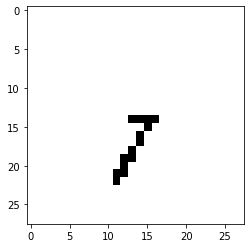

In [173]:
for i in range(sev.shape[0]):
    for j in range(sev.shape[1]):
        if (sev[i][j] <= 75): sev[i][j] = 0
        else: sev[i][j] = 255
sev= np.invert(sev)
s7 = cv2.resize(sev, (28,28))
plt.imshow(s7, cmap = "Greys")
s7 = s7.reshape(1, 28, 28, 1)

s7 = s7.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
s7 /= 255

In [167]:
pred1 = model.predict(s7)
print(pred1.argmax())

6


In [127]:
seven

array([[[203, 214, 212],
        [205, 213, 213],
        [204, 212, 212],
        ...,
        [200, 205, 208],
        [200, 205, 208],
        [200, 205, 208]],

       [[203, 214, 212],
        [205, 213, 213],
        [204, 212, 212],
        ...,
        [200, 205, 208],
        [200, 205, 208],
        [200, 205, 208]],

       [[202, 213, 211],
        [204, 212, 212],
        [204, 212, 212],
        ...,
        [200, 205, 208],
        [200, 205, 208],
        [200, 205, 208]],

       ...,

       [[204, 206, 207],
        [204, 206, 207],
        [204, 206, 207],
        ...,
        [200, 206, 205],
        [200, 206, 205],
        [200, 206, 205]],

       [[204, 206, 207],
        [204, 206, 207],
        [204, 206, 207],
        ...,
        [198, 207, 204],
        [198, 207, 204],
        [198, 207, 204]],

       [[204, 206, 207],
        [204, 206, 207],
        [204, 206, 207],
        ...,
        [198, 207, 204],
        [198, 207, 204],
        [198, 207, 204]]